# Projeto 7: Classificação de roupas

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Carregamento da base de dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
fashion_train_df = pd.read_csv('/content/fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('/content/fashion-mnist-test.csv', sep = ',')

# Etapa 3: Visualização dos dados

In [5]:
fashion_train_df.head()#Show the first 5 images

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0      30.0      43.0       0.0   
3       0  ...       3.0       0.0       0.0       0.0       0.0       1.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 785 columns]

In [8]:
fashion_train_df.tail()#Show the last 5 images

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
23658      3       0       0       0       0       0       0       0       0   
23659      3       0       0       0       0       0       0     141     211   
23660      0       0       0       0       0       0       0       0       0   
23661      8       0       0       0       0       0       0       0       0   
23662      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
23658       4  ...       8.0      10.0      12.0       0.0       0.0   
23659     126  ...     198.0     206.0     207.0      42.0       0.0   
23660       0  ...       0.0       0.0       0.0       0.0       0.0   
23661       0  ...       0.0       0.0       0.0       0.0       0.0   
23662       0  ...       NaN       NaN       NaN       NaN       NaN   

       pixel780  pixel781  pixel782  pixel783  pixel784  
23658       0.0       0.0       0.0       0.0       0.0  
23659       3.0       0.0       0.0       0.0       0.0  
23660       0.0       0.0       0.0       0.0       0.0  
23661       0.0       0.0       0.0       0.0       0.0  
23662       NaN       NaN       NaN       NaN       NaN  

[5 rows x 785 columns]

In [47]:
fashion_train_df.shape

(60000, 785)

In [16]:
training = np.array(fashion_train_df, dtype = 'float32')#Convert to the numpy format
testing = np.array(fashion_test_df, dtype='float32')#Convert to the numpy formats

In [13]:
training

array([[ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 6.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  0.,  0., ...,  0.,  0.,  0.],
       [ 7.,  0.,  0., ..., nan, nan, nan]], dtype=float32)

In [ ]:
training.shape

(60000, 785)

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

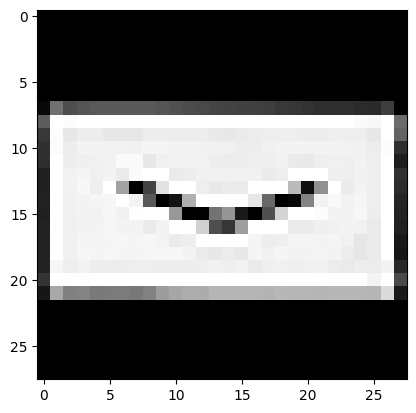

In [21]:
i = random.randint(1, 60000)
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray');

In [ ]:
label = training[i,0]
label

9.0

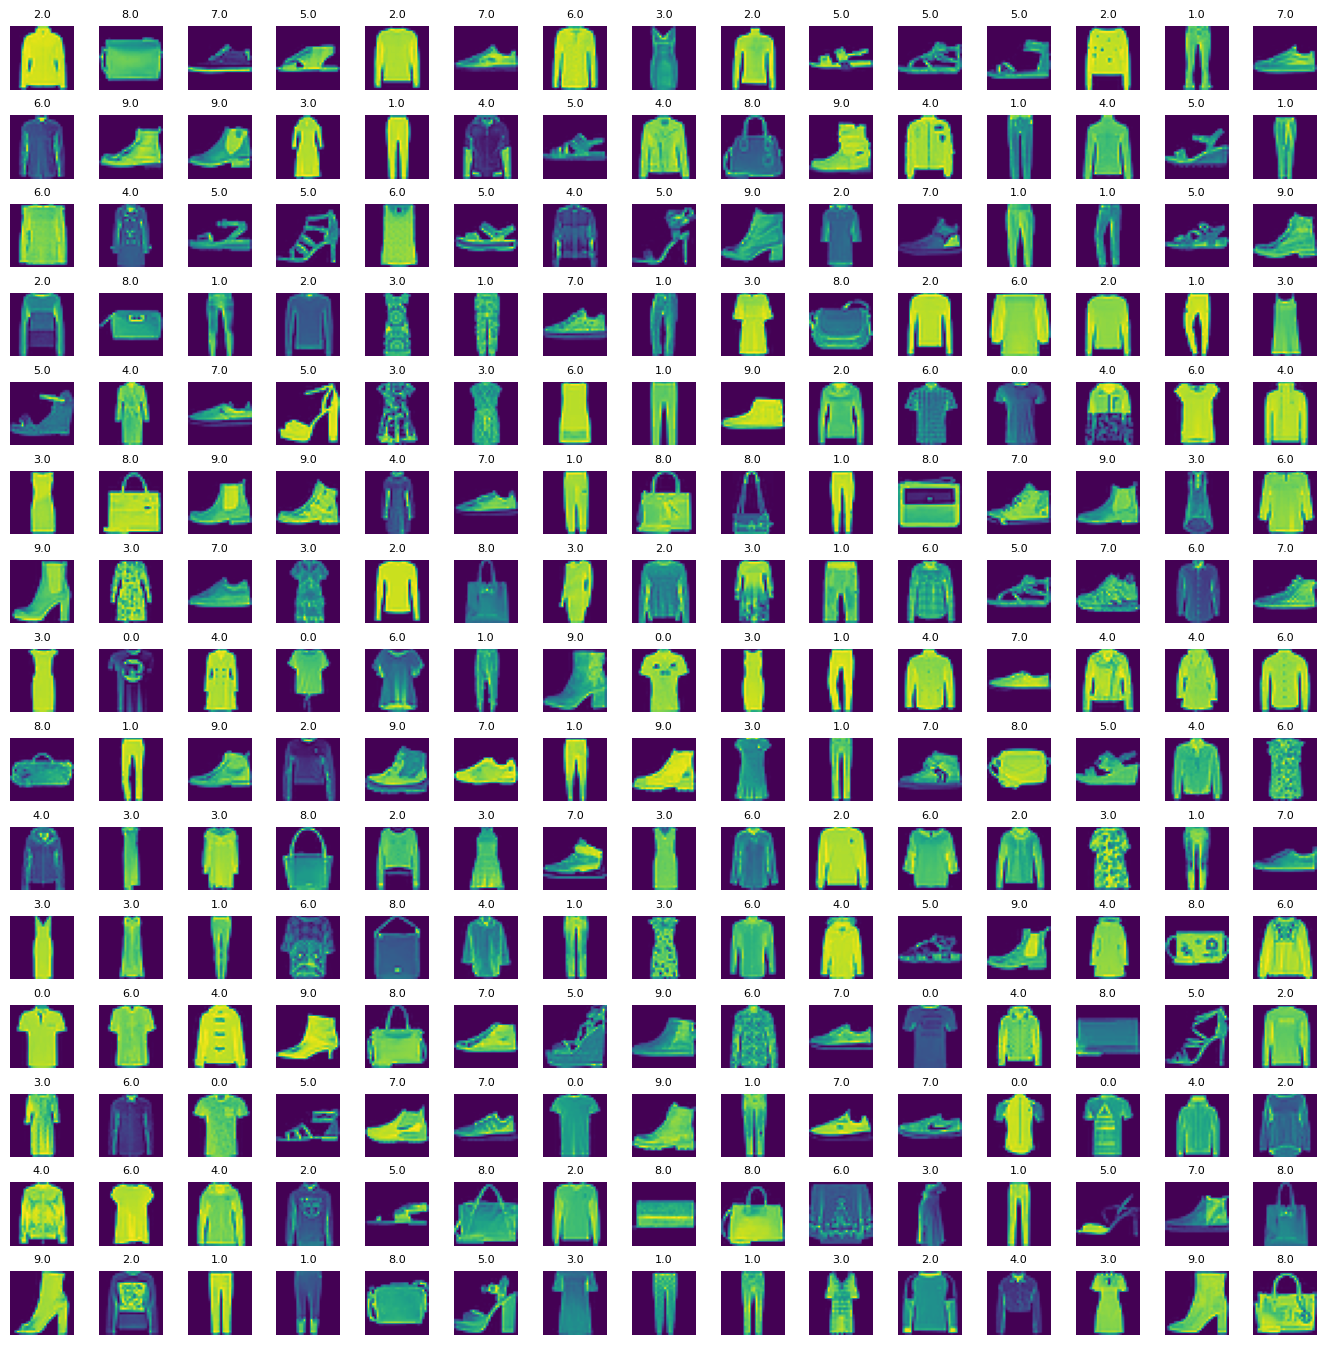

In [25]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)))
  axes[i].set_title(training[index,0], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [ ]:
n_training

60000

# Etapa 4: Tratamento da base de dados

In [26]:
X_train = training[:,1:] / 255#Assign to X_train variable all the lines and all the columns(except the first) with the value content divided by 255
y_train = training[:,0]#The final result(Dependent variable)

In [27]:
X_test = testing[:,1:] / 255#Assign to X_test variable all the lines and all the columns(except the first) with the value content divided by 255
y_test = testing[:,0]#The final result(Dependent variable)

In [28]:
X_train.shape

(60000, 784)

In [29]:
y_train.shape

(60000,)

In [30]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
#Convert the data to the format that the Input of the Neural Networks is expecting
#(images,length,width, channel)
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

In [33]:
X_train.shape
#6000 images
#28 length and width
#1 color channel

(60000, 28, 28, 1)

In [34]:
X_test.shape

(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo

In [35]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))#Do the convolution step in the image
# 32 => Number of filters(kernels) of the convolutional layer
# 3x3 => Specify the size of the kernel window
cnn.add(layers.MaxPooling2D(2,2))#Apply the Downsampling resizing the image to 2x2

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))#Do the convolution step in the image
cnn.add(layers.MaxPooling2D(2,2))#Apply the Downsampling resizing the image to 2x2

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))#Do the convolution step in the image

cnn.add(layers.Flatten())#Apply the Flattening

cnn.add(layers.Dense(64, activation = 'relu'))#Creates a traditional neural network to received the processed data

cnn.add(layers.Dense(10, activation = 'softmax'))#Creates a traditional neural network to received the processed data

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [36]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [37]:
epochs = 150
history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/150
118/118 [==============================] - 10s 24ms/step - loss: 0.8465 - accuracy: 0.7018
Epoch 2/150
118/118 [==============================] - 1s 9ms/step - loss: 0.4763 - accuracy: 0.8265
Epoch 3/150
118/118 [==============================] - 1s 9ms/step - loss: 0.4074 - accuracy: 0.8545
Epoch 4/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3702 - accuracy: 0.8682
Epoch 5/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3444 - accuracy: 0.8776
Epoch 6/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3217 - accuracy: 0.8842
Epoch 7/150
118/118 [==============================] - 1s 9ms/step - loss: 0.3050 - accuracy: 0.8911
Epoch 8/150
118/118 [==============================] - 1s 10ms/step - loss: 0.2885 - accuracy: 0.8978
Epoch 9/150
118/118 [==============================] - 1s 9ms/step - loss: 0.2790 - accuracy: 0.9007
Epoch 10/150
118/118 [==============================] - 1s 10ms/step - loss: 0.2661 - ac

# Etapa 6: Avaliação do modelo

In [45]:
evaluation = cnn.evaluate(X_test, y_test)
#Evaluate the perform of the training according the test dataset predicting and comparig to the correct value

313/313 [==============================] - 1s 2ms/step - loss: 0.8010 - accuracy: 0.9168


In [46]:
evaluation#[loss_value, accuracy]

[0.8009901642799377, 0.9168000221252441]

In [44]:
predict_x=cnn.predict(X_test)#Try predict
predicted_classes=np.argmax(predict_x,axis=1)#Convert it to the Numpy array

313/313 [==============================] - 1s 2ms/step


In [43]:
predicted_classes

array([[1.0000000e+00, 7.7514567e-25, 2.2928371e-19, ..., 1.7387894e-36,
        2.8854516e-14, 5.3059214e-22],
       [7.3799719e-26, 1.0000000e+00, 1.3769835e-33, ..., 0.0000000e+00,
        4.7936092e-30, 3.3433263e-38],
       [4.9748685e-04, 1.7507621e-19, 5.9399122e-01, ..., 6.9790752e-28,
        6.1050090e-18, 9.9793203e-18],
       ...,
       [2.9883168e-32, 1.4861877e-36, 0.0000000e+00, ..., 2.2839070e-34,
        1.0000000e+00, 1.4148731e-27],
       [1.2532050e-07, 2.2246855e-19, 1.1352851e-16, ..., 6.0779082e-15,
        9.9999988e-01, 1.6319632e-16],
       [7.1530884e-08, 8.2569450e-01, 1.7890198e-09, ..., 6.8928615e-23,
        3.4630626e-05, 1.0431974e-17]], dtype=float32)

In [ ]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

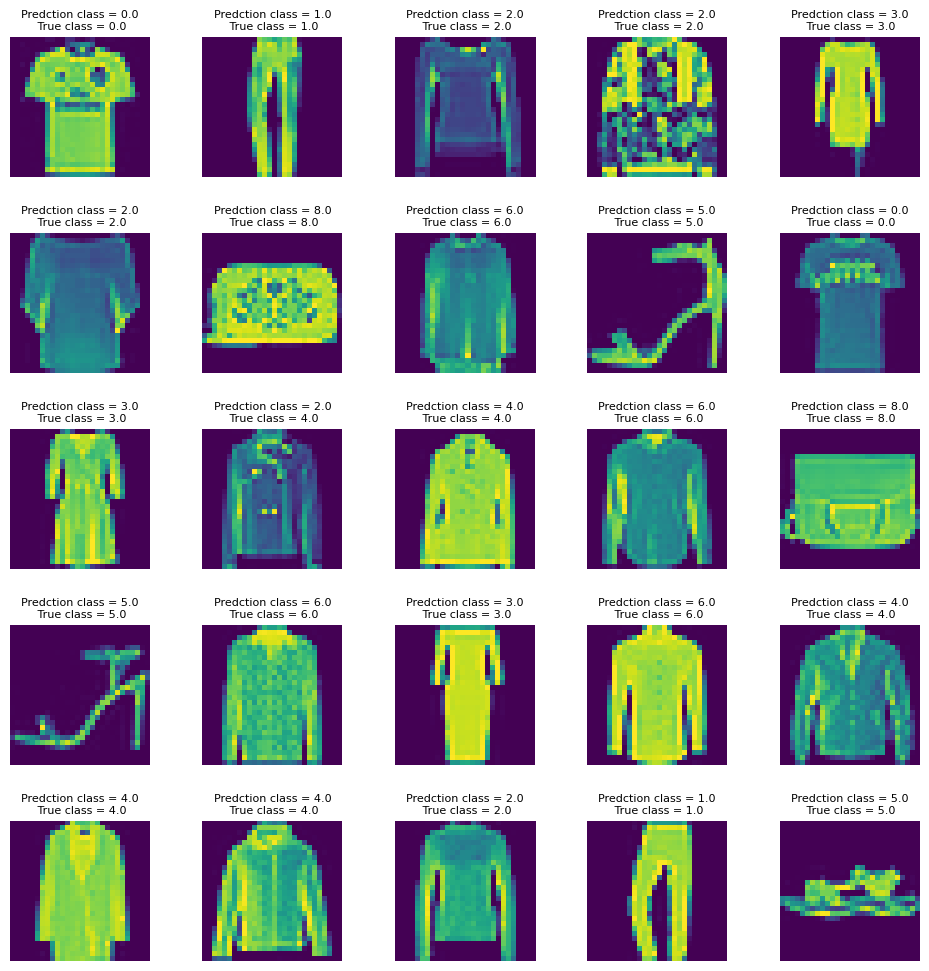

In [41]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)))
  axes[i].set_title("Predction class = {:0.1f}\n True class = {:0.1f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

<Axes: >

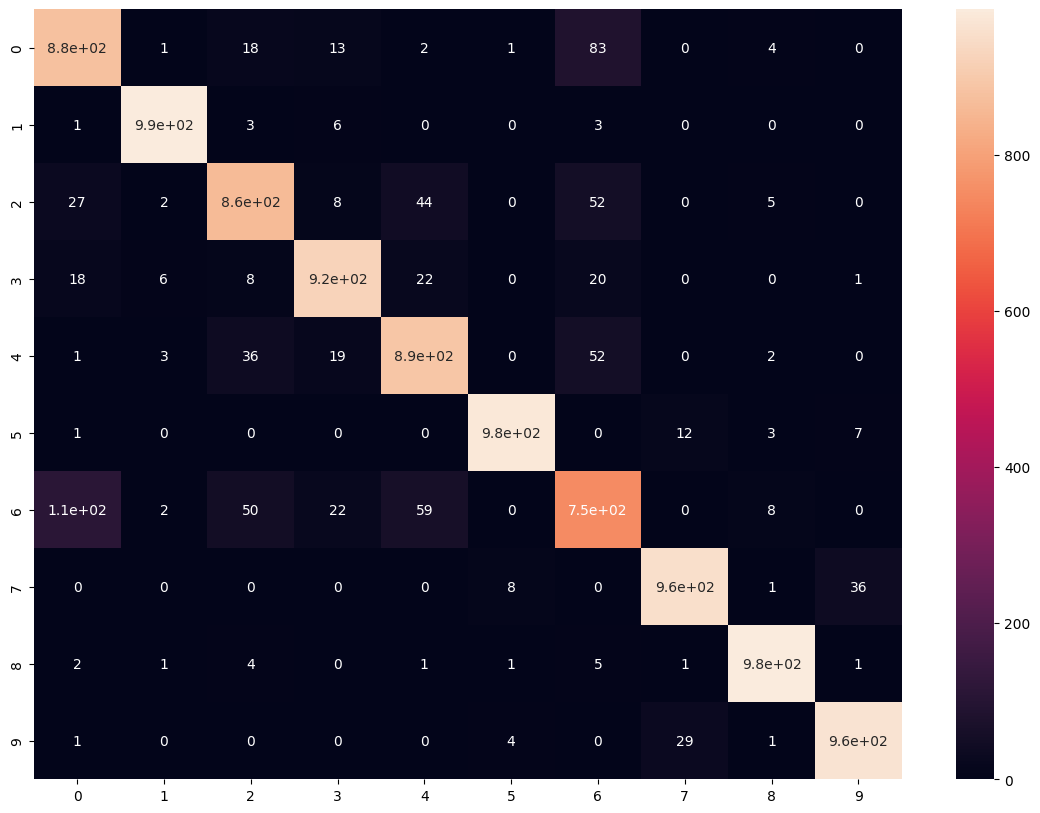

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [ ]:
cm

array([[879,   2,  24,  15,   2,   2,  70,   0,   6,   0],
       [  1, 989,   3,   4,   2,   0,   1,   0,   0,   0],
       [ 21,   1, 866,  11,  46,   1,  51,   0,   3,   0],
       [ 20,   9,   7, 918,  24,   0,  20,   0,   2,   0],
       [  1,   0,  38,  24, 868,   0,  66,   0,   3,   0],
       [  2,   0,   0,   0,   0, 973,   0,  17,   1,   7],
       [109,   1,  51,  34,  44,   0, 755,   0,   6,   0],
       [  0,   0,   0,   0,   0,   7,   0, 957,   0,  36],
       [  4,   0,   2,   1,   2,   1,   4,   1, 984,   1],
       [  0,   0,   0,   0,   0,   3,   0,  27,   2, 968]])

In [ ]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [ ]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.88      0.86      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.87      0.87      1000
     Class 3       0.91      0.92      0.91      1000
     Class 4       0.88      0.87      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.78      0.76      0.77      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

